# **VIDEO GAMES SALES**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
import math
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
data = pd.read_csv('/content/vgsales.csv.zip')


In [ ]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.drop(['Rank','Name','Platform','Year','Genre','Publisher'], axis =1,inplace=True)
data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c384ff90>,
      dtype=object)

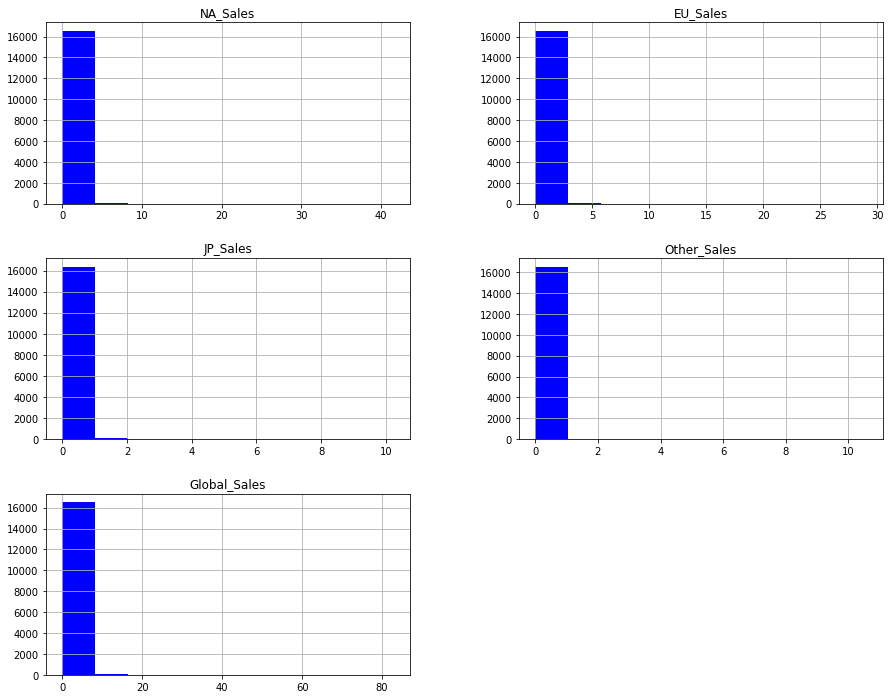

In [ ]:
data.hist(figsize=(15,12), color="blue")

In [ ]:
data.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


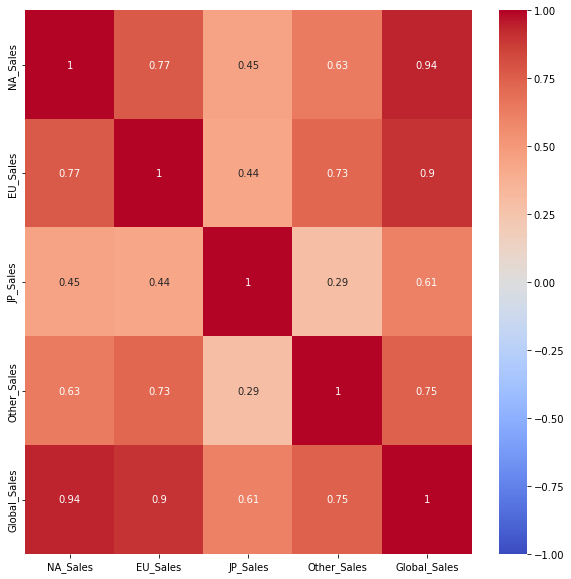

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

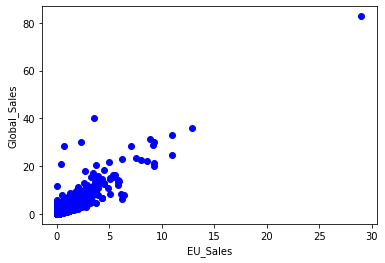

In [ ]:
plt.scatter(data["EU_Sales"],data["Global_Sales"],color='blue')
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")
plt.show()

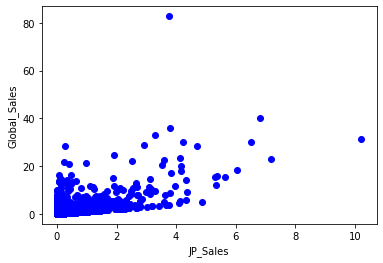

In [ ]:
plt.scatter(data["JP_Sales"],data["Global_Sales"],color='blue')
plt.xlabel("JP_Sales")
plt.ylabel("Global_Sales")
plt.show()

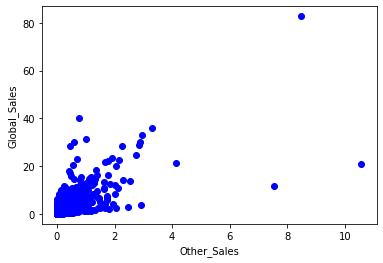

In [ ]:
plt.scatter(data["Other_Sales"],data["Global_Sales"],color='blue')
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")
plt.show()

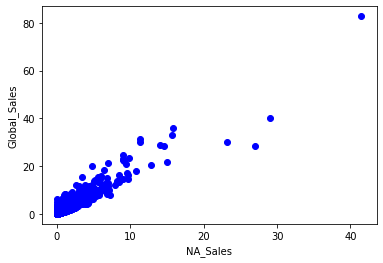

In [ ]:
plt.scatter(data["NA_Sales"],data["Global_Sales"],color='blue')
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
plt.show()

in conclusion the NA sales has the biggest impact on the global sales

After removing columns that has no relation: x--> feature y--> target

In [ ]:
# Create the list of features below
feature_name = data["NA_Sales"]
X = feature_name.values


label=["Global_Sales"]
y=data[label]


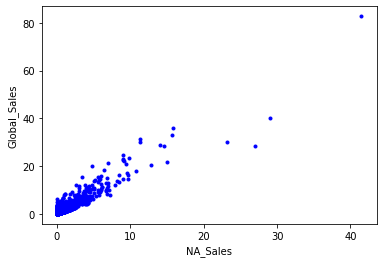

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
plt.show()


### **Linear Regression**

In [ ]:

train=data[:(int((len(data)*0.8)))]#from 0 to 0.8    80%
test=data[(int((len(data)*0.8))):]#from 0.8 to 1     20%


In [ ]:
regr=linear_model.LinearRegression()
#TRAIN
train_x=np.array(train[["NA_Sales"]])
train_y=np.array(train[["Global_Sales"]])

#TEST
test_x =np.array(test[["NA_Sales"]])
test_y  =np.array(test[["Global_Sales"]])

regr.fit(train_x,train_y)

LinearRegression()

In [ ]:
print("coefficient: ",regr.coef_)
print("Intercept: ",regr.intercept_)

coefficient:  [[1.78682474]]
Intercept:  [0.07767173]


Text(0, 0.5, 'Global_Sales')

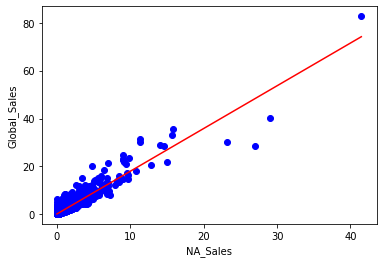

In [ ]:
plt.scatter(train["NA_Sales"],train["Global_Sales"],color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_,'-r')

plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")

## **TESTING & TRAINING ERROR**

In [ ]:
#TRAINING 
print("TRAINING error")

train_y_ =regr.predict(train_x)         #y hat

print("Mean absolute error: %.2f" %np.mean(np.absolute(train_y_ - train_y)))
print("Mean sum of squares(MSE): %.2f" %np.mean((train_y_ - train_y) ** 2))

rms=math.sqrt(mean_squared_error(train_y,train_y_))
print("Root mean square is: %.2f" %rms)

TRAINING error
Mean absolute error: 0.24
Mean sum of squares(MSE): 0.34
Root mean square is: 0.59


In [ ]:
#TESTING
test_x =np.array(test[["NA_Sales"]])
test_y  =np.array(test[["Global_Sales"]])

test_y_ =regr.predict(test_x)         #y hat
print("TESTING error")

print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares(MSE): %.4f" %np.mean((test_y_ - test_y) ** 2))

rms=math.sqrt(mean_squared_error(test_y,test_y_))
print("Root mean square is: %.2f" %rms)

TESTING error
Mean absolute error: 0.07
Mean sum of squares(MSE): 0.0047
Root mean square is: 0.07


## **Polynomial Features**



3rd degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
X[0]

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

X_new= np.linspace(-3, 40, 16598).reshape(16598, 1)

X_new_poly = poly_features.transform(X_new)

polytrainYpred= lin_reg.predict(X_poly)
polytestYnew = lin_reg.predict(X_new_poly)



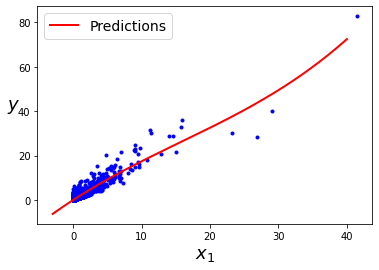

In [ ]:
#Plotting the graph
plt.plot(X, y, "b.")
plt.plot(X_new, polytestYnew, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


In [ ]:
train = lin_reg.predict(X_poly)
print("Mean Sum of Squares (training error)= %.3f" % np.mean(( train - y) ** 2))
print("Mean Sum of Squares (testing error)= %.3f" % np.mean((polytestYnew - y) ** 2))


Mean Sum of Squares (training error)= 0.268
Mean Sum of Squares (testing error)= 1418.289


30-th degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=30, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
X[0]

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

X_new= np.linspace(-3, 40, 16598).reshape(16598, 1)

X_new_poly = poly_features.transform(X_new)
polytrainYpred= lin_reg.predict(X_poly)
polytestYnew = lin_reg.predict(X_new_poly)



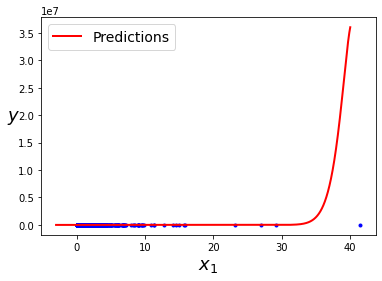

In [ ]:
#Plotting the graph
plt.plot(X, y, "b.")
plt.plot(X_new, polytestYnew, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


In [ ]:
train = lin_reg.predict(X_poly)
print("Mean Sum of Squares (training error)= %.3f" % np.mean(( train - y) ** 2))
print("Mean Sum of Squares (testing error)= %.3f" % np.mean((polytestYnew - y) ** 2))

Mean Sum of Squares (training error)= 1.816
Mean Sum of Squares (testing error)= 35784365892203.047


100 degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=100, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
X[0]

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

X_new= np.linspace(-3, 40, 16598).reshape(16598, 1)

X_new_poly = poly_features.transform(X_new)
polytrainYpred= lin_reg.predict(X_poly)
polytestYnew = lin_reg.predict(X_new_poly)

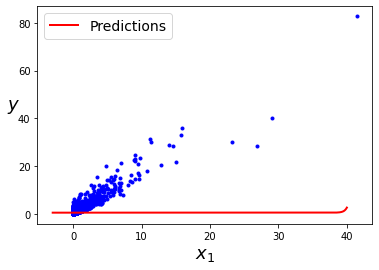

In [ ]:
#Plotting the graph
plt.plot(X, y, "b.")
plt.plot(X_new, polytestYnew, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


In [ ]:
train = lin_reg.predict(X_poly)
print("Mean Sum of Squares (training error)= %.3f" % np.mean(( train - y) ** 2))
print("Mean Sum of Squares (testing error)= %.3f" % np.mean((polytestYnew - y) ** 2))


Mean Sum of Squares (training error)= 2.011
Mean Sum of Squares (testing error)= 2.459


## **Accuracy**

In [ ]:
Accuracy = regr.score(train_x, train_y)
print ("Accuracy in the train data: ", Accuracy*100, "%")

Accuracy = regr.score(test_x, test_y)
print ("Accuracy in the test data: ", Accuracy*100, "%")

Accuracy in the train data:  88.2707501924821 %
Accuracy in the test data:  -3473.137204856885 %


## **Ridge**

In [ ]:
#test
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

ridge_reg.fit(test_x,test_y)

predict_y = ridge_reg.predict(test_x)
print("Mean Sum of Squares = %.7f" % np.mean(( predict_y - test_y) ** 2))

Mean Sum of Squares = 0.0001203


In [ ]:
#train
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

ridge_reg.fit(train_x,train_y)

predict_y = ridge_reg.predict(train_x)
print("Mean Sum of Squares = %.7f" % np.mean(( predict_y - train_y) ** 2))

Mean Sum of Squares = 0.3449309


## **Lasso**


In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(test_x,test_y)

predict_y = lasso_reg.predict(test_x)

print("Mean Sum of Squares = %.7f" % mean_squared_error(predict_y, test_y))



Mean Sum of Squares = 0.0001316


In [ ]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(train_x,train_y)

predict_y = lasso_reg.predict(train_x)

print("Mean Sum of Squares = %.7f" % mean_squared_error(predict_y, train_y))


Mean Sum of Squares = 0.3572303
